# Latar Belakang

Sebuah perusahaan yang bergerak di bidang pemasaran produk konsumen melalui berbagai saluran distribusi, seperti website, katalog, dan toko fisik. Dalam upaya meningkatkan profitabilitas dan loyalitas pelanggan, perusahaan telah mengumpulkan data yang mencakup demografi, perilaku pembelian, dan respons pelanggan terhadap kampanye pemasaran. Namun, dengan data yang semakin besar, perusahaan menghadapi tantangan untuk memahami karakteristik pelanggan dan mengoptimalkan strategi pemasaran mereka. Dalam hal ini, analisis data yang mendalam diperlukan untuk mengungkap pola, segmentasi, dan prediksi yang dapat meningkatkan efisiensi operasional serta profitabilitas.

# Rumusan Masalah

Memahami karakteristik pelanggan mereka berdasarkan profil demografi, perilaku pembelian, dan respons terhadap kampanye pemasaran. Pemahaman ini diperlukan untuk mengidentifikasi segmen pelanggan yang paling menguntungkan, mengevaluasi efektivitas kampanye pemasaran, dan mengoptimalkan saluran penjualan yang digunakan, seperti website, katalog, maupun toko fisik. Selain itu, perusahaan juga menghadapi tantangan untuk meningkatkan loyalitas pelanggan dan mengurangi risiko churn dengan memahami faktor-faktor yang mendorong pelanggan tetap aktif berbelanja. Oleh karena itu, perusahaan membutuhkan analisis mendalam untuk menemukan pola-pola dalam data yang dapat digunakan untuk memaksimalkan profitabilitas dan merancang strategi pemasaran yang lebih efektif berdasarkan perilaku pelanggan.

### Data

**Attributes Information**

| **Kategori** | **Kolom** | **Deskripsi** |
| --- | --- | --- |
| Orang | ID | ID unik untuk setiap pelanggan. |
|  | Year_Birth | Tahun kelahiran pelanggan. |
|  | Education | Tingkat pendidikan pelanggan. |
|  | Marital_Status | Status pernikahan pelanggan. |
|  | Income | Pendapatan rumah tangga pelanggan per tahun (USD). |
|  | Kidhome | Jumlah anak kecil yang tinggal di rumah pelanggan yang di biayai. |
|  | Teenhome | Jumlah remaja yang tinggal di rumah pelanggan yang di biayai. |
|  | Dt_Customer | Tanggal pelanggan mulai terdaftar di perusahaan. |
|  | Recency | Jumlah hari sejak pembelian terakhir oleh pelanggan. |
|  | Complain | Nilai 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak. |
| Produk | MntWines | Total pengeluaran pelanggan untuk anggur dalam 2 tahun terakhir. |
|  | MntFruits | Total pengeluaran pelanggan untuk buah dalam 2 tahun terakhir. |
|  | MntMeatProducts | Total pengeluaran pelanggan untuk daging dalam 2 tahun terakhir. |
|  | MntFishProducts | Total pengeluaran pelanggan untuk ikan dalam 2 tahun terakhir. |
|  | MntSweetProducts | Total pengeluaran pelanggan untuk permen dalam 2 tahun terakhir. |
|  | MntGoldProds | Total pengeluaran pelanggan untuk emas dalam 2 tahun terakhir. |
| Promosi | NumDealsPurchases | Jumlah pembelian yang dilakukan dengan diskon. |
|  | AcceptedCmp1 | Nilai 1 jika pelanggan menerima tawaran dalam kampanye pertama, 0 jika tidak. |
|  | AcceptedCmp2 | Nilai 1 jika pelanggan menerima tawaran dalam kampanye kedua, 0 jika tidak. |
|  | AcceptedCmp3 | Nilai 1 jika pelanggan menerima tawaran dalam kampanye ketiga, 0 jika tidak. |
|  | AcceptedCmp4 | Nilai 1 jika pelanggan menerima tawaran dalam kampanye keempat, 0 jika tidak. |
|  | AcceptedCmp5 | Nilai 1 jika pelanggan menerima tawaran dalam kampanye kelima, 0 jika tidak. |
|  | Response | Nilai 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 jika tidak. |
| Tempat | NumWebPurchases | Jumlah pembelian yang dilakukan melalui website perusahaan. |
|  | NumCatalogPurchases | Jumlah pembelian yang dilakukan melalui katalog. |
|  | NumStorePurchases | Jumlah pembelian yang dilakukan langsung di toko. |
|  | NumWebVisitsMonth | Jumlah kunjungan ke website perusahaan dalam 1 bulan terakhir. |

<br>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from operator import attrgetter

In [38]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Data Understanding

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [40]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [41]:
# Membuat data unik di tiap kolom, ditambah tipe data
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].dropna().unique()[:10].tolist(), df[col].dtype])  # Menambahkan tipe data

# Membuat DataFrame deskripsi dengan tipe data
tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample', 'Data Type'],
                          data=listItem)

# Menampilkan DataFrame
tabel1Desc

,Column Name,Number of Unique,Unique Sample,Data Type
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...",int64
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198...",int64
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]",object
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A...",object
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...",float64
5,Kidhome,3,"[0, 1, 2]",int64
6,Teenhome,3,"[0, 1, 2]",int64
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...",object
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11]",int64
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5]",int64


- Total data ada 2240.
- total kolom 29.
- Terdapat missing value pada kolom `Income`.
- `Dt_Customer` memiliki tipe data object, yang seharusnya date-time.
- Terdapat value "YOLO" dan "Absurd" dalam status pernikahan yang artinya masih ambigu.
- Kolom Z_CostContact dan Z_Revenue tidak relevan karena tidak ada nominal uniq dari customer.

### Data cleaning

**Missing Value Kolom `Income`**

In [42]:
# Mengecek kolom yang memiliki missing value, jumlah missing value, dan persentasenya
missing_values = df.isnull().sum()  # Menghitung jumlah missing value per kolom
missing_percentage = (missing_values / len(df)) * 100  # Menghitung persentase missing value

# Membuat DataFrame untuk menampilkan hasil
missing_summary = pd.DataFrame({
    'Kolom': df.columns,
    'Jumlah Missing Value': missing_values,
    'Persentase Missing Value (%)': missing_percentage
}).reset_index(drop=True)

# Menampilkan kolom yang memiliki missing value
missing_summary = missing_summary[missing_summary['Jumlah Missing Value'] > 0]
missing_summary

,Kolom,Jumlah Missing Value,Persentase Missing Value (%)
4,Income,24,1.071429


In [43]:
# Mengecek missing value pada kolom 'Income' dan melihat apakah itu terdapat pada pelanggan dengan jumlah pembelian tinggi atau rendah
# Definisikan 'jumlah pembelian' sebagai total pembelian dari semua saluran (NumWebPurchases, NumCatalogPurchases, NumStorePurchases)

# Filter data dengan missing value pada 'Income'
missing_income = df[df['Income'].isnull()]

# Hitung total pembelian untuk setiap pelanggan
missing_income['TotalPurchases'] = (
    missing_income['NumWebPurchases'] +
    missing_income['NumCatalogPurchases'] +
    missing_income['NumStorePurchases']
)

# Kategorikan pembelian sebagai 'Tinggi' atau 'Rendah' berdasarkan median
median_purchases = missing_income['TotalPurchases'].median()
missing_income['PurchaseCategory'] = missing_income['TotalPurchases'].apply(
    lambda x: 'Tinggi' if x > median_purchases else 'Rendah'
)

# Mengurutkan data berdasarkan 'TotalPurchases' dari terbesar ke terkecil
missing_income_sorted = missing_income[['TotalPurchases', 'PurchaseCategory']].sort_values(by='TotalPurchases', ascending=False)

# Menampilkan hasil
missing_income_sorted.reset_index(drop=True, inplace=True)
missing_income_sorted


C:\Users\USER\AppData\Local\Temp\ipykernel_26212\1673432364.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_income['TotalPurchases'] = (
C:\Users\USER\AppData\Local\Temp\ipykernel_26212\1673432364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_income['PurchaseCategory'] = missing_income['TotalPurchases'].apply(


,TotalPurchases,PurchaseCategory
0,27,Tinggi
1,23,Tinggi
2,21,Tinggi
3,18,Tinggi
4,18,Tinggi
5,17,Tinggi
6,15,Tinggi
7,14,Tinggi
8,14,Tinggi
9,12,Tinggi


Tidak terdapat pola kusus dalam missing value di kolom income, presentase missing value juga hanya 1%, langkah selanjutnya yang saya ambil adalah dengan menghapus missing value.

In [44]:
df_cleaned = df.dropna()

**Nilai 'YOLO' pada Kolom `Marital_Status`**

In [45]:
# Memeriksa jumlah nilai "YOLO" dalam kolom Marital_Status
yolo_data = df_cleaned[df_cleaned['Marital_Status'] == 'YOLO']

# Menampilkan jumlah data dengan nilai "YOLO" dan data yang sesuai
yolo_count = yolo_data.shape[0]
yolo_data_summary = yolo_data

yolo_data.reset_index(drop=True, inplace=True)
yolo_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,0
1,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,1


**Nilai YOLO pada Kolom `Marital_Status`**

Analisa saya, "YOLO" disini berarti belum menikah karena arti dari kata ini sendiri adalah "You Only Live Once" yang dimanapelanggan mungkin tidak mementingkan status sosial dan mengisi datanya dengan "YOLO", terdapat remaja di rumah tau 'Teenhome' bukan berarti pelanggan memiliki anak, karena jika kita liat dari konteks bisnis dataset ini, berasal dari amerika yang dimana orang bisa memiliki anak tanpa pernikahan resmi (misalnya, hidup bersama pasangan), mengadopsi, atau bertanggung jawab atas remaja dalam situasi lain (misalnya, saudara kandung atau kerabat), maka dari itu bisa kita asumsikan bahwa "YOLO" berarti belum menikah atau "single".

In [46]:
# Mengubah nilai 'YOLO' pada kolom 'Marital_Status' menjadi 'Single'
df_cleaned['Marital_Status'] = df_cleaned['Marital_Status'].replace('YOLO', 'Single')

C:\Users\USER\AppData\Local\Temp\ipykernel_26212\2535266386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Marital_Status'] = df_cleaned['Marital_Status'].replace('YOLO', 'Single')


In [47]:
# Memeriksa jumlah nilai "Absurd" dalam kolom Marital_Status
absurd_data = df_cleaned[df_cleaned['Marital_Status'] == 'Absurd']

# Menampilkan jumlah data dengan nilai "Absurd" dan data yang sesuai
absurd_count = absurd_data.shape[0]
absurd_data_summary = absurd_data

absurd_data.reset_index(drop=True, inplace=True)
absurd_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,1,0,0,1,1,0,0,3,11,1
1,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,...,2,0,0,0,0,0,0,3,11,0


Untuk value "Absurd" pada kolom `Marital_Status` kita anggap single atau belum menikah karena jumlah tanggungan anak kecil maupun remaja bernilai 0.

In [48]:
# Mengubah nilai 'YOLO' pada kolom 'Marital_Status' menjadi 'Single'
df_cleaned['Marital_Status'] = df_cleaned['Marital_Status'].replace('Absurd', 'Single')

C:\Users\USER\AppData\Local\Temp\ipykernel_26212\2460737027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Marital_Status'] = df_cleaned['Marital_Status'].replace('Absurd', 'Single')


**Tipe Data Kolom `Dt_Customer`**

In [49]:
# Mengubah tipe data kolom 'Dt_Customer' dari object menjadi datetime
df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'], format='%d-%m-%Y')

C:\Users\USER\AppData\Local\Temp\ipykernel_26212\1345905155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'], format='%d-%m-%Y')


In [50]:
# Verifikasi perubahan tipe data
df_cleaned['Dt_Customer'].dtypes

dtype('<M8[ns]')

**Drop kolom Z_CostContact dan Z_Revenue**

In [51]:
# Menghapus kolom Z_CostContact dan Z_Revenue dari dataset
df_cleaned = df_cleaned.drop(columns=['Z_CostContact', 'Z_Revenue'])

**Data yang sudah bersih**

In [52]:
# Membuat data unik di tiap kolom, ditambah tipe data
listItem = []
for col in df_cleaned.columns:
    listItem.append([col, df_cleaned[col].nunique(), df_cleaned[col].dropna().unique()[:10].tolist(), df_cleaned[col].dtype])  # Menambahkan tipe data

# Membuat DataFrame deskripsi dengan tipe data
tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample', 'Data Type'],
                          data=listItem)

# Menampilkan DataFrame
tabel1Desc

,Column Name,Number of Unique,Unique Sample,Data Type
0,ID,2216,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...",int64
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198...",int64
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]",object
3,Marital_Status,6,"[Single, Together, Married, Divorced, Widow, A...",object
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...",float64
5,Kidhome,3,"[0, 1, 2]",int64
6,Teenhome,3,"[0, 1, 2]",int64
7,Dt_Customer,662,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 201...",datetime64[ns]
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59]",int64
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 6]",int64


Dataset setelah data cleaning:

- Data yang tersisa 2206 yang dimana sebelumnya 2240, ada 24 data yang terhapus.
- Kolom yang tersisa 27 yang dimana sebelumnya 29.

Dataset kini siap untuk analisis lebih lanjut

### Data Analisis

**Memahami profil pelanggan**

In [53]:
# Menambahkan kolom kelompok usia berdasarkan Year_Birth
df_cleaned['Age'] = 2014 - df_cleaned['Year_Birth']
bins = [0, 25, 35, 50, 65, 100]
labels = ['<25', '25-34', '35-49', '50-64', '65+']
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

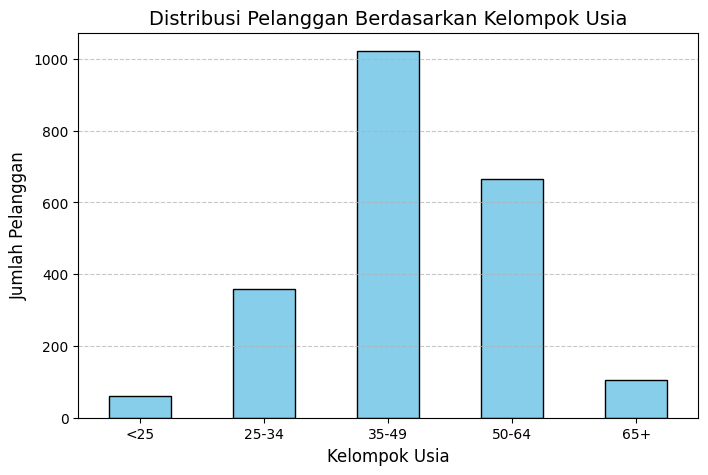

In [54]:
# Distribusi berdasarkan kelompok usia
age_group_counts = df_cleaned['Age_Group'].value_counts(sort=False)
plt.figure(figsize=(8, 5))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Pelanggan Berdasarkan Kelompok Usia', fontsize=14)
plt.xlabel('Kelompok Usia', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

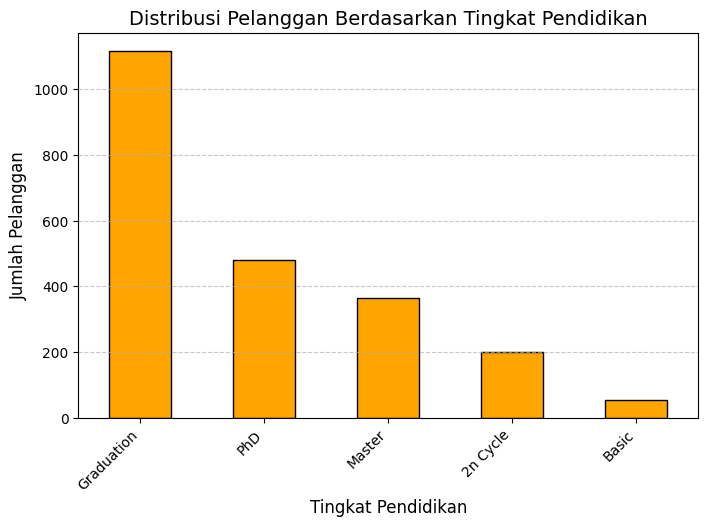

In [55]:
# Distribusi berdasarkan tingkat pendidikan
education_counts = df_cleaned['Education'].value_counts()
plt.figure(figsize=(8, 5))
education_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribusi Pelanggan Berdasarkan Tingkat Pendidikan', fontsize=14)
plt.xlabel('Tingkat Pendidikan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

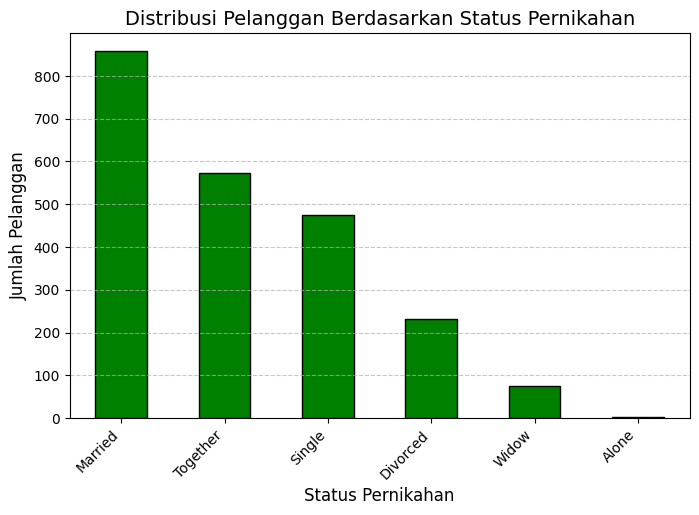

In [56]:
# Distribusi berdasarkan status pernikahan
marital_status_counts = df_cleaned['Marital_Status'].value_counts()
plt.figure(figsize=(8, 5))
marital_status_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribusi Pelanggan Berdasarkan Status Pernikahan', fontsize=14)
plt.xlabel('Status Pernikahan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

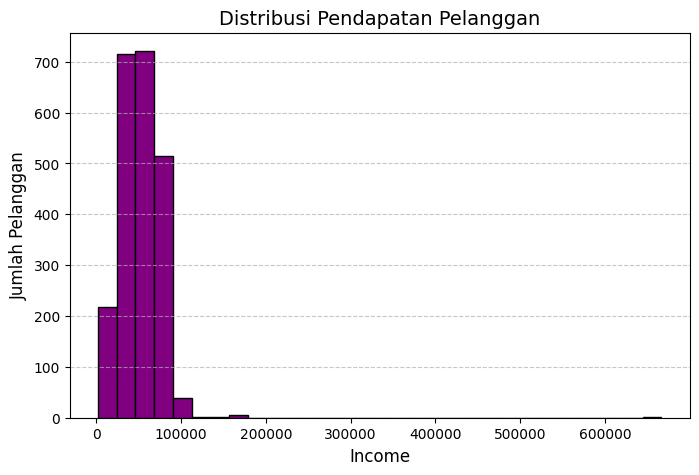

In [57]:
# Distribusi Income
plt.figure(figsize=(8, 5))
df_cleaned['Income'].plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.title('Distribusi Pendapatan Pelanggan', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

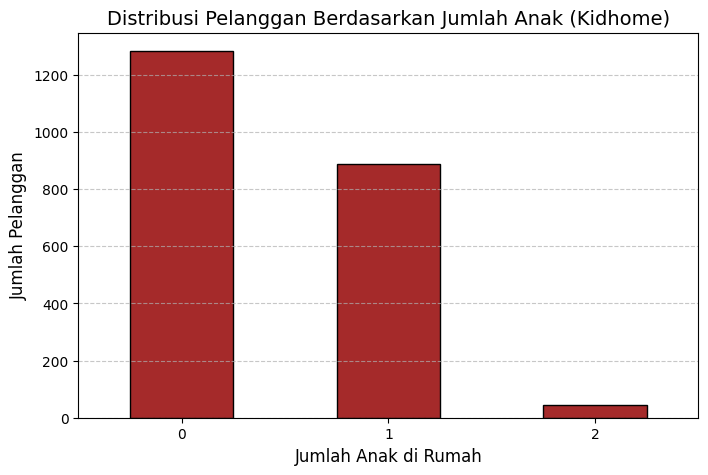

In [58]:
# Distribusi Kidhome
kidhome_counts = df_cleaned['Kidhome'].value_counts()
plt.figure(figsize=(8, 5))
kidhome_counts.plot(kind='bar', color='brown', edgecolor='black')
plt.title('Distribusi Pelanggan Berdasarkan Jumlah Anak (Kidhome)', fontsize=14)
plt.xlabel('Jumlah Anak di Rumah', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

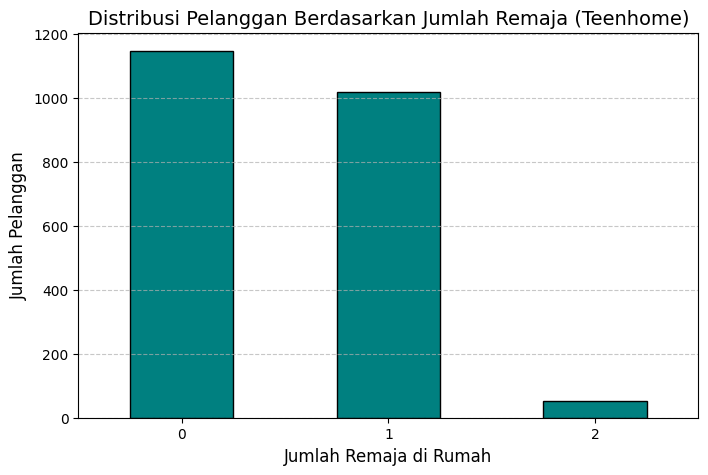

In [59]:
# Distribusi Teenhome
teenhome_counts = df_cleaned['Teenhome'].value_counts()
plt.figure(figsize=(8, 5))
teenhome_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Distribusi Pelanggan Berdasarkan Jumlah Remaja (Teenhome)', fontsize=14)
plt.xlabel('Jumlah Remaja di Rumah', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Mayoritas pelanggan berada dalam kelompok usia 35-49 dan 50-64, sementara pelanggan usia di bawah 25 tahun relatif sedikit. Sebagian besar pelanggan memiliki tingkat pendidikan "Graduation", diikuti oleh tingkat pendidikan "PhD" dan "Master", sedangkan tingkat pendidikan "Basic" relatif sedikit. Dari segi status pernikahan, pelanggan dengan status "Married" mendominasi, diikuti oleh "Together" dan "Single", sementara status "Widow" dan "Alone" adalah yang paling sedikit. Distribusi pendapatan pelanggan terkonsentrasi di bawah 100.000, dengan sebagian kecil pelanggan memiliki pendapatan tinggi. Sebagian besar pelanggan tidak memiliki anak atau remaja di rumah, sementara yang memiliki 1 anak atau remaja juga cukup signifikan. Pelanggan dengan 2 anak atau remaja di rumah adalah yang paling sedikit.

**Mengetahui pola belanja**

In [60]:
# 1. Analisis pengeluaran pelanggan pada berbagai saluran pembelian
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_totals = df_cleaned[purchase_channels].sum()

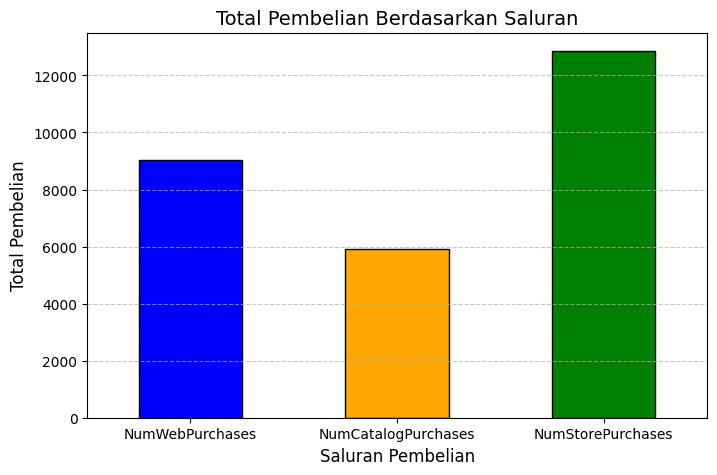

In [61]:
# Visualisasi total pembelian per saluran
plt.figure(figsize=(8, 5))
channel_totals.plot(kind='bar', color=['blue', 'orange', 'green'], edgecolor='black')
plt.title('Total Pembelian Berdasarkan Saluran', fontsize=14)
plt.xlabel('Saluran Pembelian', fontsize=12)
plt.ylabel('Total Pembelian', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

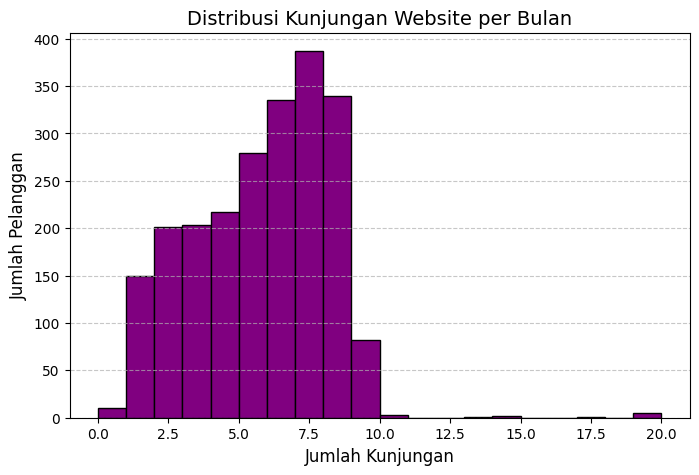

In [62]:
# Distribusi kunjungan ke website per bulan
plt.figure(figsize=(8, 5))
df_cleaned['NumWebVisitsMonth'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Distribusi Kunjungan Website per Bulan', fontsize=14)
plt.xlabel('Jumlah Kunjungan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [63]:
# 3. Total pengeluaran per kategori produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_totals = df_cleaned[product_columns].sum()

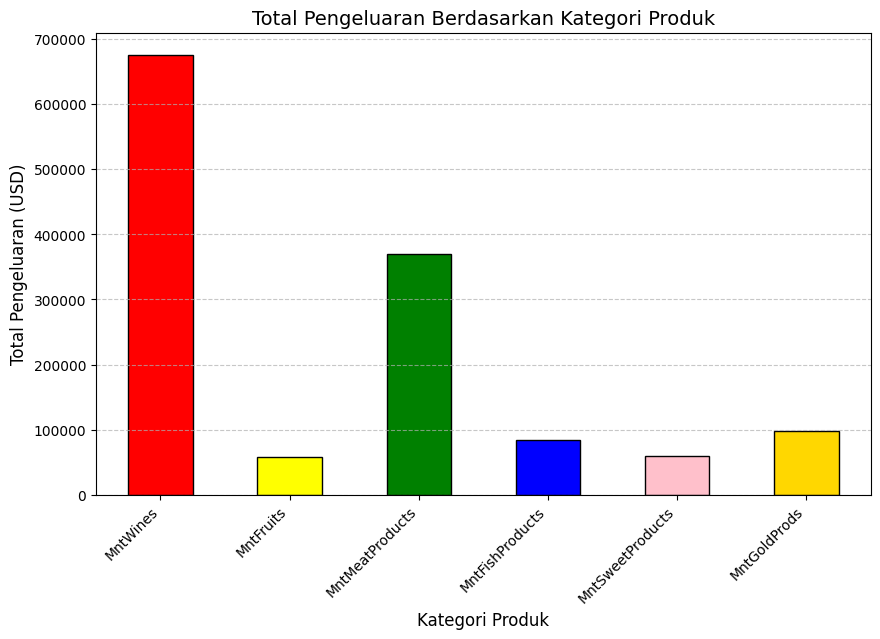

In [64]:
# Visualisasi total pengeluaran per kategori produk
plt.figure(figsize=(10, 6))
product_totals.plot(kind='bar', color=['red', 'yellow', 'green', 'blue', 'pink', 'gold'], edgecolor='black')
plt.title('Total Pengeluaran Berdasarkan Kategori Produk', fontsize=14)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Pengeluaran (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [65]:
# 4. Insight tambahan: Rasio pembelian online terhadap total pembelian
# Menambahkan kolom rasio pembelian online
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_cleaned['OnlinePurchaseRatio'] = df_cleaned['NumWebPurchases'] / df_cleaned[purchase_columns].sum(axis=1)

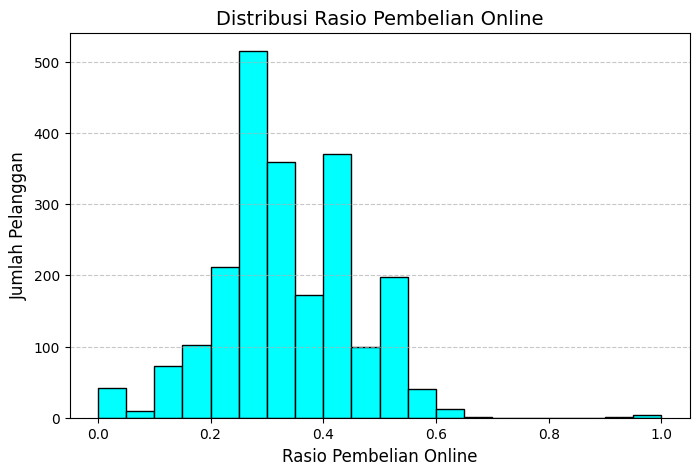

In [66]:
# Distribusi rasio pembelian online
plt.figure(figsize=(8, 5))
df_cleaned['OnlinePurchaseRatio'].plot(kind='hist', bins=20, color='cyan', edgecolor='black')
plt.title('Distribusi Rasio Pembelian Online', fontsize=14)
plt.xlabel('Rasio Pembelian Online', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [67]:
# Menampilkan beberapa insight dalam tabel
summary = {
    'Saluran Pembelian': ['Website', 'Katalog', 'Toko'],
    'Total Pembelian': channel_totals.values
}

In [68]:
summary_df = pd.DataFrame(summary)
print("Insight Total Pembelian per Saluran:")
summary_df

Insight Total Pembelian per Saluran:


,Saluran Pembelian,Total Pembelian
0,Website,9053
1,Katalog,5919
2,Toko,12855


In [69]:
# Menampilkan total pengeluaran per kategori produk
total_expense_df = pd.DataFrame({'Kategori Produk': product_columns, 'Total Pengeluaran (USD)': product_totals.values})
print("\nInsight Total Pengeluaran per Kategori Produk:")
total_expense_df


Insight Total Pengeluaran per Kategori Produk:


,Kategori Produk,Total Pengeluaran (USD)
0,MntWines,676083
1,MntFruits,58405
2,MntMeatProducts,370063
3,MntFishProducts,83405
4,MntSweetProducts,59896
5,MntGoldProds,97427


Toko fisik menjadi saluran utama dengan total pembelian tertinggi, yaitu 12.855 pembelian. Pembelian melalui website berada di posisi kedua dengan total 9.053 pembelian, sementara pembelian melalui katalog adalah yang paling sedikit dengan total 5.919 pembelian. Sebagian besar pelanggan mengunjungi website sebanyak 5-10 kali per bulan, menunjukkan aktivitas yang moderat dalam penggunaan platform online. Dalam kategori produk, anggur (MntWines) mendominasi pengeluaran pelanggan dengan total USD 676.083, diikuti oleh daging (MntMeatProducts) dengan total USD 370.063. Pengeluaran untuk buah, ikan, permen, dan emas jauh lebih kecil dibandingkan anggur dan daging, dengan masing-masing berkisar antara USD 58.405 hingga USD 97.427.

Kesimpulan ini menunjukkan bahwa toko fisik masih menjadi saluran utama untuk pembelian, sementara anggur dan daging adalah produk dengan kontribusi terbesar terhadap total pengeluaran pelanggan.

**Evaluasi efektivitas kampanye pemasaran**

In [70]:
# Menghitung tingkat respons rata-rata untuk setiap kampanye
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_response_rates = df_cleaned[campaign_columns].mean() * 100

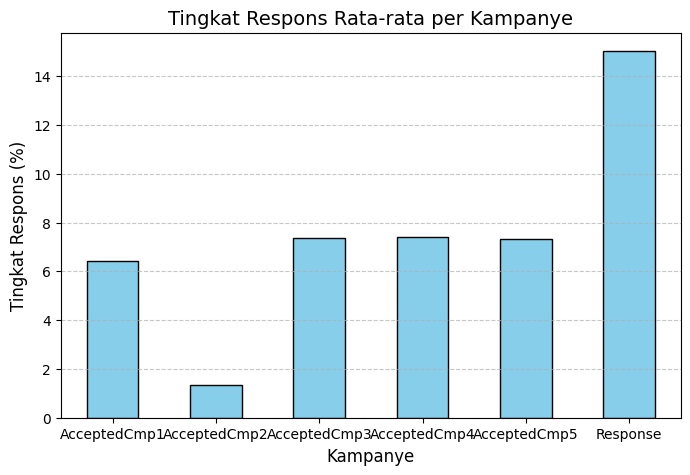

In [71]:
# Visualisasi tingkat respons rata-rata per kampanye
plt.figure(figsize=(8, 5))
campaign_response_rates.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Tingkat Respons Rata-rata per Kampanye', fontsize=14)
plt.xlabel('Kampanye', fontsize=12)
plt.ylabel('Tingkat Respons (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [72]:
# Membandingkan respons berdasarkan karakteristik pelanggan
# 1. Berdasarkan kelompok usia
age_response = df_cleaned.groupby('Age_Group')[campaign_columns].mean() * 100

C:\Users\USER\AppData\Local\Temp\ipykernel_26212\1345649806.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_response = df_cleaned.groupby('Age_Group')[campaign_columns].mean() * 100


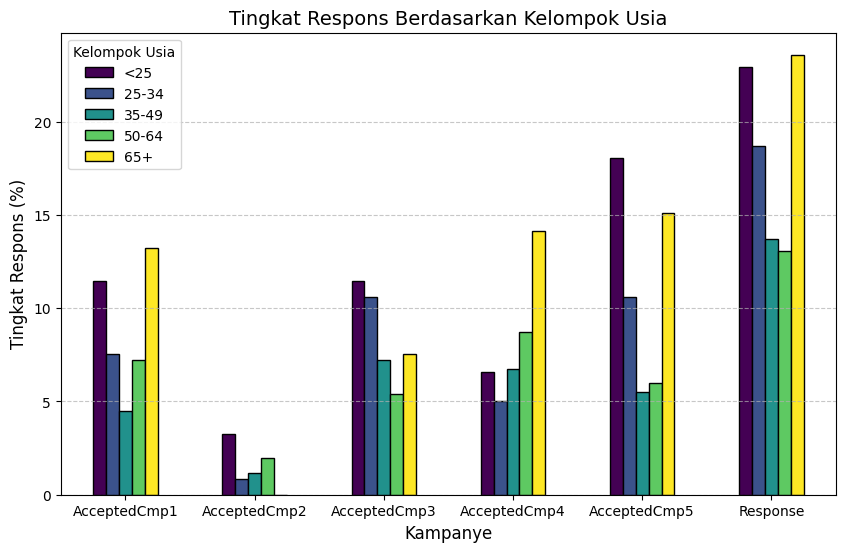

In [73]:
# Visualisasi respons berdasarkan kelompok usia
age_response.T.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title('Tingkat Respons Berdasarkan Kelompok Usia', fontsize=14)
plt.xlabel('Kampanye', fontsize=12)
plt.ylabel('Tingkat Respons (%)', fontsize=12)
plt.legend(title='Kelompok Usia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [74]:
# 2. Berdasarkan tingkat pendidikan
education_response = df_cleaned.groupby('Education')[campaign_columns].mean() * 100

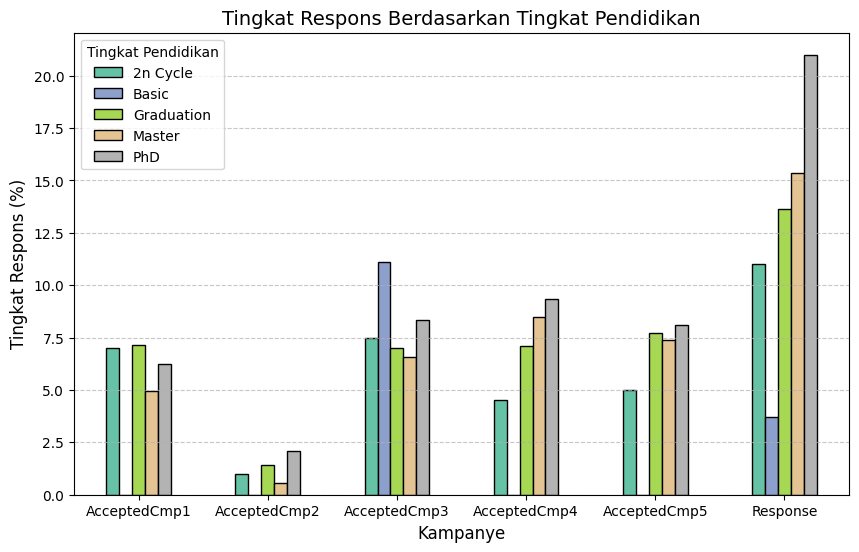

In [75]:
# Visualisasi respons berdasarkan tingkat pendidikan
education_response.T.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')
plt.title('Tingkat Respons Berdasarkan Tingkat Pendidikan', fontsize=14)
plt.xlabel('Kampanye', fontsize=12)
plt.ylabel('Tingkat Respons (%)', fontsize=12)
plt.legend(title='Tingkat Pendidikan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [76]:
# 3. Berdasarkan pendapatan (Income)
income_bins = [0, 30000, 60000, 90000, 120000, 150000, df_cleaned['Income'].max()]
income_labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '>150K']
df_cleaned['Income_Group'] = pd.cut(df_cleaned['Income'], bins=income_bins, labels=income_labels)

In [77]:
income_response = df_cleaned.groupby('Income_Group')[campaign_columns].mean() * 100

C:\Users\USER\AppData\Local\Temp\ipykernel_26212\791620053.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_response = df_cleaned.groupby('Income_Group')[campaign_columns].mean() * 100


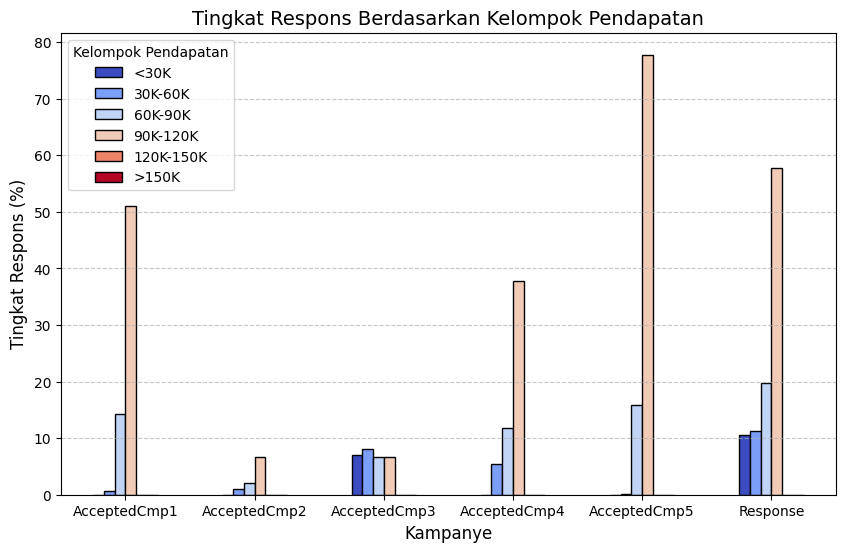

In [78]:
# Visualisasi respons berdasarkan kelompok pendapatan
income_response.T.plot(kind='bar', figsize=(10, 6), colormap='coolwarm', edgecolor='black')
plt.title('Tingkat Respons Berdasarkan Kelompok Pendapatan', fontsize=14)
plt.xlabel('Kampanye', fontsize=12)
plt.ylabel('Tingkat Respons (%)', fontsize=12)
plt.legend(title='Kelompok Pendapatan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [79]:
# Menyusun kesimpulan
print("\nKesimpulan Tingkat Respons per Kampanye:")
campaign_response_rates


Kesimpulan Tingkat Respons per Kampanye:


AcceptedCmp1     6.407942
AcceptedCmp2     1.353791
AcceptedCmp3     7.355596
AcceptedCmp4     7.400722
AcceptedCmp5     7.310469
Response        15.027076
dtype: float64

In [80]:
print("\nKesimpulan Respons Berdasarkan Kelompok Usia:")
age_response


Kesimpulan Respons Berdasarkan Kelompok Usia:


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Age_Group,,,,,,
<25,11.475410,3.278689,11.475410,6.557377,18.032787,22.950820
25-34,7.541899,0.837989,10.614525,5.027933,10.614525,18.715084
35-49,4.500978,1.174168,7.240705,6.751468,5.479452,13.698630
50-64,7.207207,1.951952,5.405405,8.708709,6.006006,13.063063
65+,13.207547,0.000000,7.547170,14.150943,15.094340,23.584906


In [81]:
print("\nKesimpulan Respons Berdasarkan Tingkat Pendidikan:")
education_response


Kesimpulan Respons Berdasarkan Tingkat Pendidikan:


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Education,,,,,,
2n Cycle,7.000000,1.000000,7.500000,4.500000,5.000000,11.000000
Basic,0.000000,0.000000,11.111111,0.000000,0.000000,3.703704
Graduation,7.168459,1.433692,6.989247,7.078853,7.706093,13.620072
Master,4.931507,0.547945,6.575342,8.493151,7.397260,15.342466
PhD,6.237006,2.079002,8.316008,9.355509,8.108108,20.997921


In [82]:
print("\nKesimpulan Respons Berdasarkan Kelompok Pendapatan:")
income_response


Kesimpulan Respons Berdasarkan Kelompok Pendapatan:


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Income_Group,,,,,,
<30K,0.000000,0.000000,7.027027,0.000000,0.000000,10.540541
30K-60K,0.696517,0.995025,8.159204,5.373134,0.199005,11.243781
60K-90K,14.213198,2.157360,6.598985,11.802030,15.862944,19.670051
90K-120K,51.111111,6.666667,6.666667,37.777778,77.777778,57.777778
120K-150K,NaN,NaN,NaN,NaN,NaN,NaN
>150K,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Kampanye terakhir memiliki tingkat respons tertinggi (15.03%), menunjukkan bahwa pelanggan lebih banyak merespons kampanye terkini. Kampanye kedua memiliki tingkat respons terendah (1.35%), menandakan perlunya evaluasi pada strategi kampanye tersebut. Pelanggan usia 25-34 tahun menunjukkan tingkat respons tertinggi di hampir semua kampanye, termasuk kampanye terakhir, sedangkan pelanggan usia 50-64 tahun memiliki respons yang cukup stabil tetapi lebih rendah dibandingkan kelompok usia muda. Pelanggan dengan tingkat pendidikan "PhD" memiliki tingkat respons tertinggi, terutama pada kampanye terakhir (21%), sementara pelanggan dengan tingkat pendidikan "Graduation" menunjukkan respons yang konsisten di semua kampanye. Pelanggan dengan pendapatan 90K-120K memiliki tingkat respons tertinggi di semua kampanye, dengan respons yang luar biasa pada kampanye terakhir (57.78%), sementara pelanggan dengan pendapatan rendah (<30K) menunjukkan tingkat respons yang sangat rendah di semua kampanye.

Kesimpulan ini menunjukkan bahwa kelompok pelanggan tertentu (usia muda, pendidikan tinggi, dan pendapatan menengah-atas) lebih responsif terhadap kampanye pemasaran.

**Identifikasi pelanggan loyal dan churn**

In [83]:
# Membatasi dataset untuk pelanggan yang bergabung pada tahun 2012
df_2012 = df_cleaned[df_cleaned['Dt_Customer'].dt.year == 2012].copy()

# Membatasi dataset untuk pelanggan yang bergabung pada tahun 2013
df_2013 = df_cleaned[df_cleaned['Dt_Customer'].dt.year == 2013].copy()

# Membatasi dataset untuk pelanggan yang bergabung pada tahun 2014
df_2014 = df_cleaned[df_cleaned['Dt_Customer'].dt.year == 2014].copy()

In [84]:
# Step 1 and Step 2: Membuat cohort_month dan current_order_month
df_2012.loc[:, "cohort_month"] = df_2012.groupby("ID")["Dt_Customer"].transform("min").dt.to_period("M")
df_2012.loc[:, "current_order_month"] = df_2012["Dt_Customer"].dt.to_period("M")

In [85]:
cohort_analysis = df_2012.groupby("cohort_month").agg({
    "Income": "mean",
    "Age": "mean",
    "ID": "count"  # Total pelanggan dalam cohort
}).rename(columns={"ID": "n_customers"})

cohort_analysis

,Income,Age,n_customers
cohort_month,,,
2012-07,53680.500000,54.000000,2
2012-08,50834.735043,43.316239,117
2012-09,55623.989691,45.680412,97
2012-10,51146.621053,42.884211,95
2012-11,51436.750000,45.604167,96
2012-12,45978.397590,43.156627,83


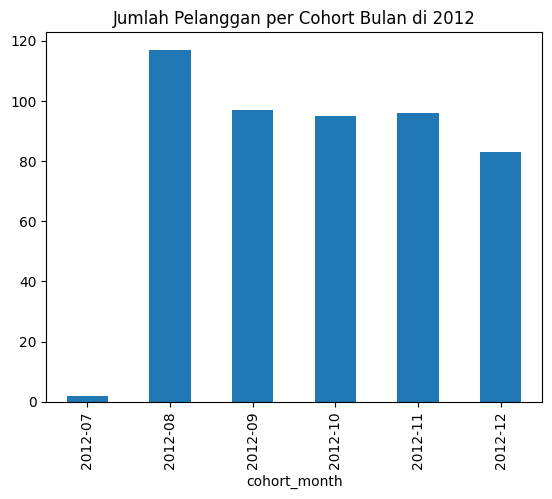

In [86]:
cohort_analysis["n_customers"].plot(kind="bar", title="Jumlah Pelanggan per Cohort Bulan di 2012")
plt.show()

In [87]:
# Step 1 and Step 2: Membuat cohort_month dan current_order_month
df_2013.loc[:, "cohort_month"] = df_2013.groupby("ID")["Dt_Customer"].transform("min").dt.to_period("M")
df_2013.loc[:, "current_order_month"] = df_2013["Dt_Customer"].dt.to_period("M")

In [88]:
cohort_analysis2 = df_2013.groupby("cohort_month").agg({
    "Income": "mean",
    "Age": "mean",
    "ID": "count"  # Total pelanggan dalam cohort
}).rename(columns={"ID": "n_customers"})

cohort_analysis2

,Income,Age,n_customers
cohort_month,,,
2013-01,49999.037383,45.214953,107
2013-02,50342.505051,45.707071,99
2013-03,51070.584158,46.108911,101
2013-04,54194.689655,45.310345,87
2013-05,56301.637255,47.078431,102
2013-06,60746.044944,45.471910,89
2013-07,48038.193878,45.673469,98
2013-08,50980.254902,46.284314,102
2013-09,50577.500000,46.808511,94


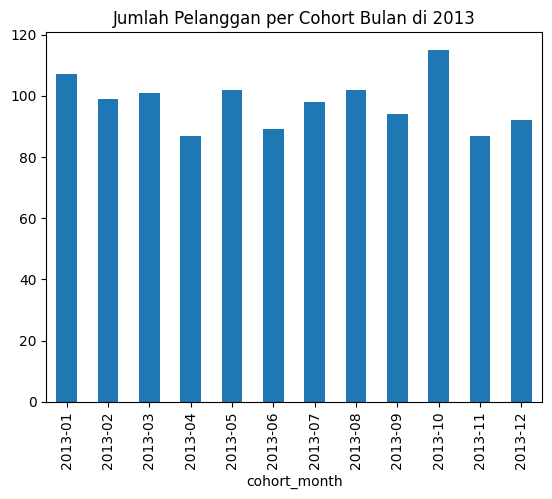

In [89]:
cohort_analysis2["n_customers"].plot(kind="bar", title="Jumlah Pelanggan per Cohort Bulan di 2013")
plt.show()

In [90]:
# Step 1 and Step 2: Membuat cohort_month dan current_order_month
df_2014.loc[:, "cohort_month"] = df_2014.groupby("ID")["Dt_Customer"].transform("min").dt.to_period("M")
df_2014.loc[:, "current_order_month"] = df_2014["Dt_Customer"].dt.to_period("M")

In [91]:
cohort_analysis3 = df_2014.groupby("cohort_month").agg({
    "Income": "mean",
    "Age": "mean",
    "ID": "count"  # Total pelanggan dalam cohort
}).rename(columns={"ID": "n_customers"})

cohort_analysis3

,Income,Age,n_customers
cohort_month,,,
2014-01,53570.431818,46.352273,88
2014-02,53418.256410,41.307692,78
2014-03,50974.370370,45.805556,108
2014-04,53716.702128,46.351064,94
2014-05,52812.099099,43.909910,111
2014-06,52917.864865,47.364865,74


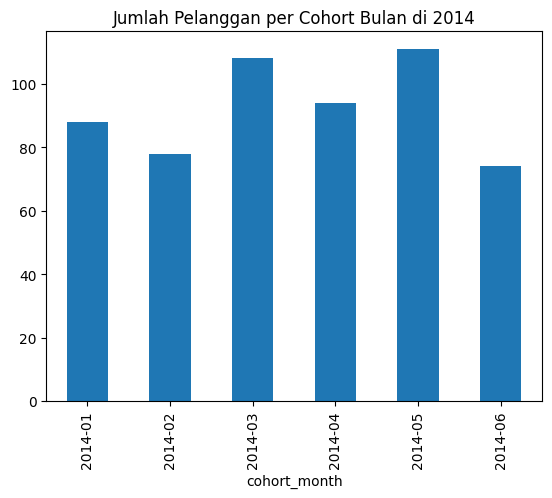

In [92]:
cohort_analysis3["n_customers"].plot(kind="bar", title="Jumlah Pelanggan per Cohort Bulan di 2014")
plt.show()

In [93]:
# Step 1: Klasifikasi pelanggan berdasarkan Recency
bins = [0, 30, 90, df_cleaned['Recency'].max()]
labels = ['Loyal', 'Infrequent', 'At Risk']
df_cleaned['LoyaltySegment'] = pd.cut(df_cleaned['Recency'], bins=bins, labels=labels)

In [94]:
# Step 2: Total Purchases untuk setiap LoyaltySegment
df_cleaned['TotalPurchases'] = df_cleaned['NumWebPurchases'] + df_cleaned['NumCatalogPurchases'] + df_cleaned['NumStorePurchases']

In [95]:
# Step 3: Menambahkan Monetary Value
df_cleaned['MonetaryValue'] = df_cleaned['MntWines'] + df_cleaned['MntFruits'] + df_cleaned['MntMeatProducts'] + df_cleaned['MntFishProducts'] + df_cleaned['MntSweetProducts'] + df_cleaned['MntGoldProds']

In [96]:
# Step 3: Ringkasan Total Purchases per segmen
loyalty_summary = df_cleaned.groupby('LoyaltySegment')['TotalPurchases'].agg(['count', 'mean', 'sum']).reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_26212\545475452.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loyalty_summary = df_cleaned.groupby('LoyaltySegment')['TotalPurchases'].agg(['count', 'mean', 'sum']).reset_index()


In [97]:
# Step 4: Ringkasan Monetary Value per segmen loyalitas
rfm_summary = df_cleaned.groupby('LoyaltySegment')[['MonetaryValue']].agg(['count', 'mean', 'sum']).reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_26212\1343394520.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_summary = df_cleaned.groupby('LoyaltySegment')[['MonetaryValue']].agg(['count', 'mean', 'sum']).reset_index()


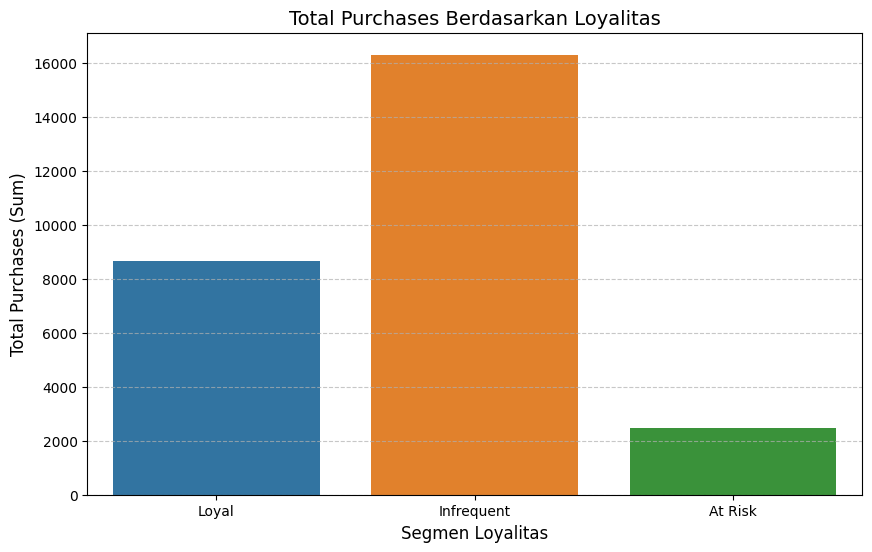

In [98]:
# Step 4: Visualisasi distribusi Total Purchases per segmen
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_summary, x='LoyaltySegment', y='sum', hue='LoyaltySegment')
plt.title('Total Purchases Berdasarkan Loyalitas', fontsize=14)
plt.xlabel('Segmen Loyalitas', fontsize=12)
plt.ylabel('Total Purchases (Sum)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

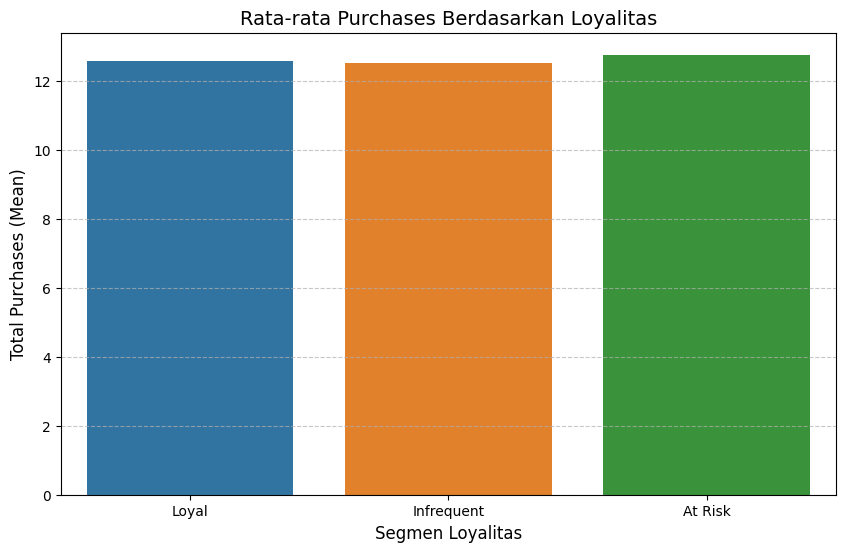

In [99]:
# Step 5: Visualisasi distribusi rata-rata Total Purchases per segmen
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_summary, x='LoyaltySegment', y='mean', hue='LoyaltySegment')
plt.title('Rata-rata Purchases Berdasarkan Loyalitas', fontsize=14)
plt.xlabel('Segmen Loyalitas', fontsize=12)
plt.ylabel('Total Purchases (Mean)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_26212\1964024712.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Loyalty Segment')


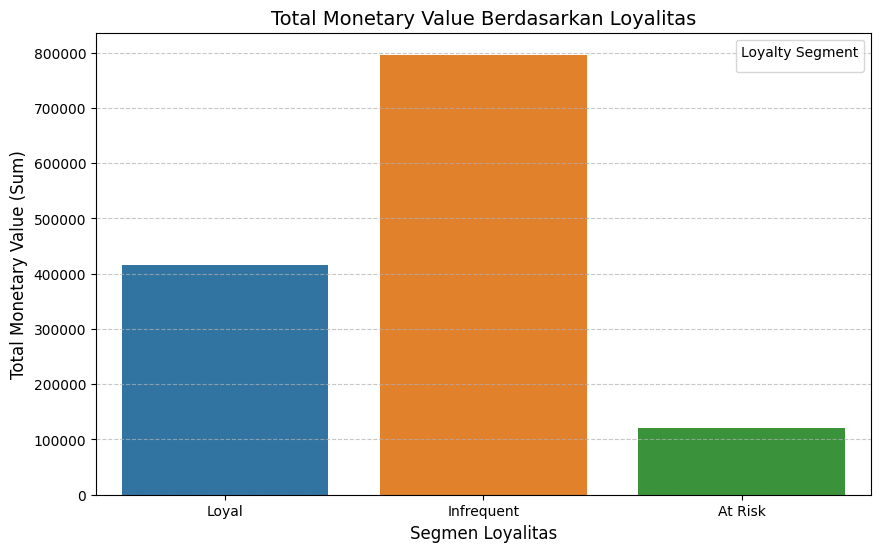

In [100]:
# Step 5: Visualisasi Total Monetary Value per segmen
plt.figure(figsize=(10, 6))
sns.barplot(data=rfm_summary, x='LoyaltySegment', y=('MonetaryValue', 'sum'), hue='LoyaltySegment', dodge=False)
plt.title('Total Monetary Value Berdasarkan Loyalitas', fontsize=14)
plt.xlabel('Segmen Loyalitas', fontsize=12)
plt.ylabel('Total Monetary Value (Sum)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loyalty Segment')
plt.show()

In [101]:
# Display ringkasan
print("Ringkasan Total Purchases per Segmen Loyalitas:")
display(loyalty_summary)

Ringkasan Total Purchases per Segmen Loyalitas:


,LoyaltySegment,count,mean,sum
0,Loyal,690,12.576812,8678
1,Infrequent,1303,12.517268,16310
2,At Risk,195,12.769231,2490


In [102]:
# Display ringkasan RFM
print("Ringkasan RFM (Recency, Frequency, Monetary) per Segmen Loyalitas:")
rfm_summary

Ringkasan RFM (Recency, Frequency, Monetary) per Segmen Loyalitas:


LoyaltySegment MonetaryValue                    
                         count        mean     sum
0          Loyal           690  603.536232  416440
1     Infrequent          1303  611.029163  796171
2        At Risk           195  615.728205  120067

Rendahnya jumlah pelanggan pada Juli 2012 disebabkan oleh keterbatasan waktu pengambilan data yang belum mencakup keseluruhan bulan, bukan karena ketertarikan pelanggan yang rendah. Konsistensi pada tahun 2013 menunjukkan stabilitas yang baik dalam pendaftaran pelanggan, sedangkan fluktuasi di tahun 2014 dapat memberikan peluang untuk evaluasi strategi pemasaran atau promosi musiman.

Segmen Infrequent memiliki total pengeluaran tertinggi sebesar USD 796,171, diikuti oleh segmen Loyal dengan total USD 416,440, sedangkan segmen At Risk memiliki total pengeluaran terendah sebesar USD 120,067. Dari rata-rata pengeluaran per pelanggan, segmen At Risk mencatat nilai tertinggi sebesar USD 615.73, diikuti oleh segmen Infrequent sebesar USD 611.03 dan segmen Loyal sebesar USD 603.54. Hal ini menunjukkan bahwa meskipun segmen At Risk memiliki kontribusi total yang kecil, pelanggan dalam segmen ini cenderung memiliki nilai rata-rata yang tinggi. Dalam hal total pembelian, segmen Infrequent mendominasi dengan 16,310 pembelian, diikuti oleh segmen Loyal dengan 8,678 pembelian, sementara segmen At Risk memiliki total pembelian terendah sebesar 2,490. Jika ada langkah berikutnya, beri tahu saya!

**Hubungan pendapatan dan preferensi**

In [103]:
# Step 1: Hitung Korelasi antara Income dan Monetary Value
df_cleaned['MonetaryValue'] = (
    df_cleaned['MntWines'] + df_cleaned['MntFruits'] +
    df_cleaned['MntMeatProducts'] + df_cleaned['MntFishProducts'] +
    df_cleaned['MntSweetProducts'] + df_cleaned['MntGoldProds']
)

In [104]:
correlation = df_cleaned[['Income', 'MonetaryValue']].corr().iloc[0, 1]
print(f"Korelasi antara Income dan Monetary Value: {correlation:.2f}")

Korelasi antara Income dan Monetary Value: 0.67


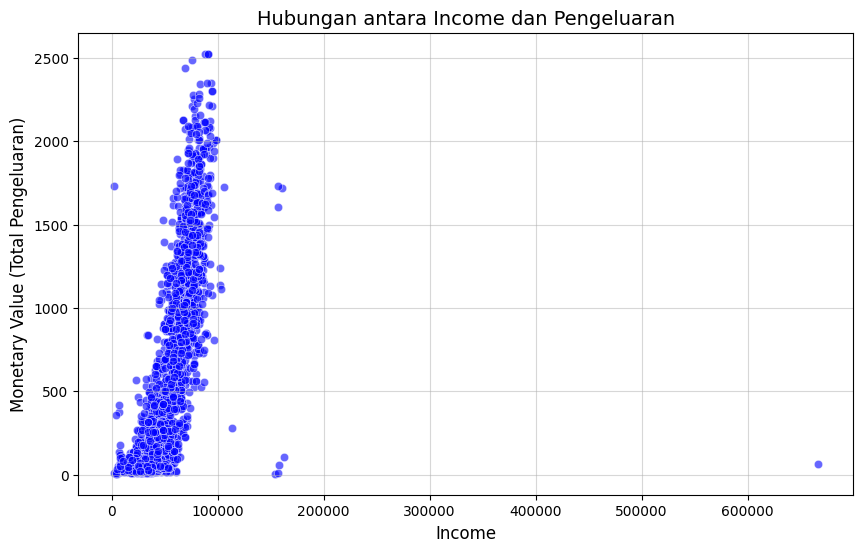

In [105]:
# Visualisasi scatter plot untuk melihat pola hubungan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Income', y='MonetaryValue', alpha=0.6, color='blue')
plt.title('Hubungan antara Income dan Pengeluaran', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Monetary Value (Total Pengeluaran)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

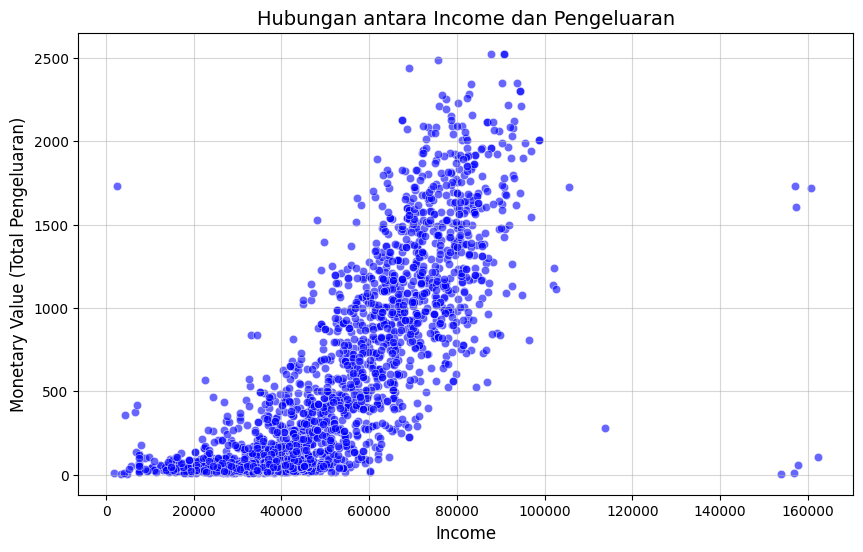

In [106]:
df_under_200 = df_cleaned[(df_cleaned['Income'] <= 200000)]

# Visualisasi scatter plot untuk melihat pola hubungan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_under_200, x='Income', y='MonetaryValue', alpha=0.6, color='blue')
plt.title('Hubungan antara Income dan Pengeluaran', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Monetary Value (Total Pengeluaran)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [107]:
# Step 2: Segmentasi Berdasarkan Income
income_bins = [0, 30000, 60000, 90000, 120000, 150000, df_cleaned['Income'].max()]
income_labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '>150K']
df_cleaned['IncomeSegment'] = pd.cut(df_cleaned['Income'], bins=income_bins, labels=income_labels)

In [108]:
# Rata-rata dan total pengeluaran per segmen income
income_summary = df_cleaned.groupby('IncomeSegment')['MonetaryValue'].agg(['mean', 'sum']).reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_26212\1729086802.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_summary = df_cleaned.groupby('IncomeSegment')['MonetaryValue'].agg(['mean', 'sum']).reset_index()


C:\Users\USER\AppData\Local\Temp\ipykernel_26212\479959524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_summary, x='IncomeSegment', y='mean', palette='viridis')


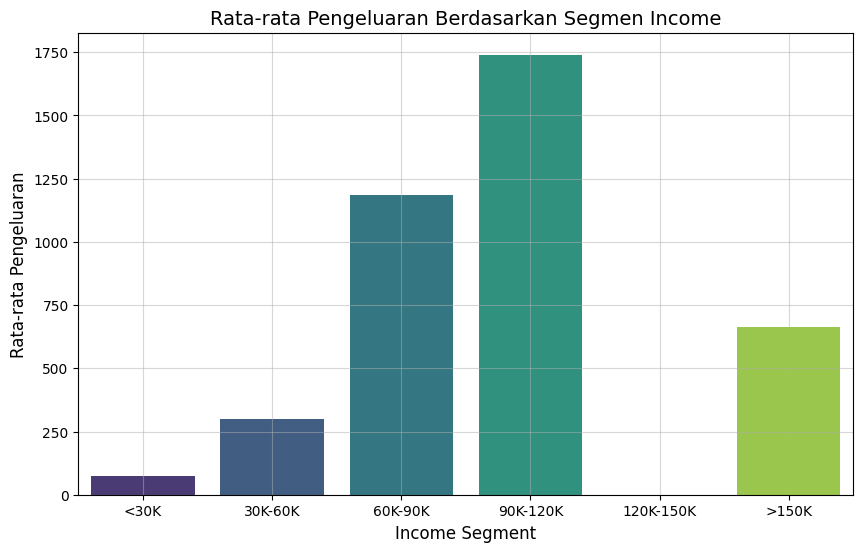

In [109]:
# Visualisasi pengeluaran per segmen income
plt.figure(figsize=(10, 6))
sns.barplot(data=income_summary, x='IncomeSegment', y='mean', palette='viridis')
plt.title('Rata-rata Pengeluaran Berdasarkan Segmen Income', fontsize=14)
plt.xlabel('Income Segment', fontsize=12)
plt.ylabel('Rata-rata Pengeluaran', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_26212\3607479348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_summary, x='IncomeSegment', y='sum', palette='coolwarm')


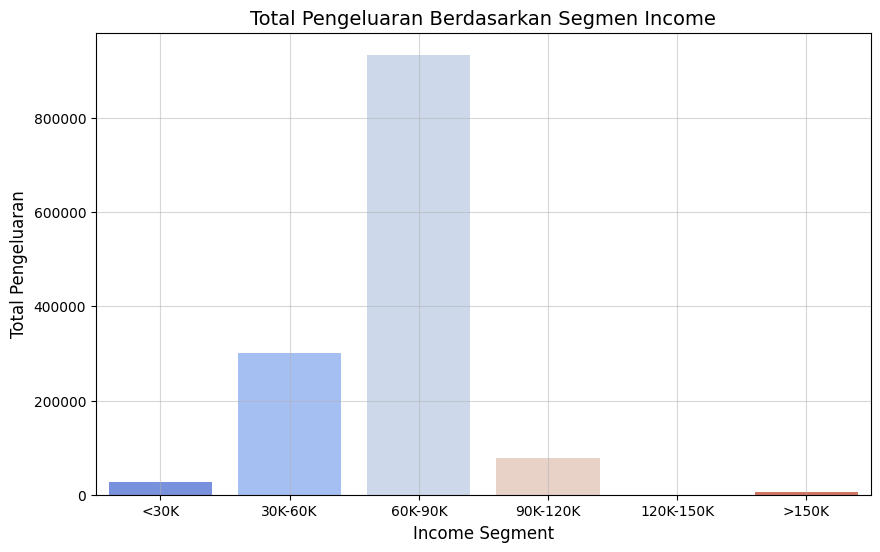

In [110]:
plt.figure(figsize=(10, 6))
sns.barplot(data=income_summary, x='IncomeSegment', y='sum', palette='coolwarm')
plt.title('Total Pengeluaran Berdasarkan Segmen Income', fontsize=14)
plt.xlabel('Income Segment', fontsize=12)
plt.ylabel('Total Pengeluaran', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [111]:
# Display summary income
print("Ringkasan Pengeluaran Berdasarkan Income Segment:")
income_summary

Ringkasan Pengeluaran Berdasarkan Income Segment:


,IncomeSegment,mean,sum
0,<30K,72.183784,26708
1,30K-60K,299.216915,300713
2,60K-90K,1185.615482,934265
3,90K-120K,1739.911111,78296
4,120K-150K,NaN,0
5,>150K,662.125000,5297


Terdapat korelasi positif yang kuat antara pendapatan dan total pengeluaran dengan nilai korelasi sebesar 0.67. Hal ini menunjukkan bahwa pelanggan dengan pendapatan lebih tinggi cenderung menghabiskan lebih banyak uang. Segmen pendapatan 60K-90K memiliki rata-rata pengeluaran tertinggi (USD 1,185.62) dan total pengeluaran terbesar (USD 934,265), menunjukkan kontribusi yang signifikan terhadap pendapatan total. Segmen 30K-60K mencatat rata-rata pengeluaran yang lebih rendah (USD 299.22) tetapi tetap memberikan kontribusi total yang cukup besar sebesar USD 300,713. Di sisi lain, segmen 90K-120K memiliki rata-rata pengeluaran tertinggi kedua (USD 1,739.91) meskipun kontribusi totalnya lebih kecil. Segmen pendapatan di bawah 30K mencatat rata-rata pengeluaran yang sangat rendah (USD 72.18) dengan total pengeluaran paling kecil sebesar USD 26,708.

### Kesimpulan dan Rekomendasi


| **Analisis**                    | **Pendekatan**                                                                 | **Insight**                                                                                                                                                  | **Rekomendasi**                                                                                                                                                                   |
|---------------------------------------|-------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Memahami profil pelanggan             | Analisis demografi berdasarkan usia, pendidikan, dan status pernikahan       | Mayoritas pelanggan berada dalam kelompok usia 35-49 dan 50-64; sebagian besar memiliki tingkat pendidikan "Graduation"; status pernikahan "Married" mendominasi.       | Fokus pada segmentasi pelanggan berdasarkan kelompok usia dan pendidikan untuk menyusun strategi pemasaran yang lebih efektif.                                                 |
| Mengetahui pola belanja               | Analisis saluran pembelian dan pengeluaran pelanggan                         | Toko fisik menjadi saluran utama; anggur dan daging adalah kategori produk dengan pengeluaran tertinggi.                                                                  | Perlu memperkuat strategi di toko fisik sambil mengeksplorasi peluang peningkatan penjualan online. Fokus pada promosi produk anggur dan daging untuk meningkatkan penjualan.    |
| Evaluasi efektivitas kampanye pemasaran| Hitung respons terhadap kampanye, bandingkan respons berdasarkan karakteristik| Kampanye terakhir memiliki tingkat respons tertinggi; pelanggan usia 25-34 tahun dan pendidikan "PhD" memiliki respons paling tinggi.                                     | Optimalkan kampanye pemasaran yang menargetkan pelanggan muda dan berpendidikan tinggi. Lakukan evaluasi menyeluruh terhadap kampanye dengan tingkat respons rendah.             |
| Identifikasi pelanggan loyal dan churn| Gunakan Recency dan Total Purchases untuk melihat pola loyalitas             | Segmen "Infrequent" memiliki kontribusi pembelian terbesar; segmen "At Risk" memiliki rata-rata pembelian tinggi meskipun kontribusinya kecil.                         | Fokus pada retensi pelanggan di segmen "At Risk" melalui kampanye personalisasi. Tingkatkan frekuensi pembelian di segmen "Infrequent" untuk memaksimalkan kontribusi.         |
| Hubungan pendapatan dan preferensi    | Korelasi antara Income dan pengeluaran                                      | Terdapat korelasi positif kuat (0.67) antara pendapatan dan pengeluaran. Segmen 60K-90K memberikan kontribusi total terbesar, sedangkan segmen <30K memiliki kontribusi kecil.| Lakukan upselling pada segmen dengan pendapatan tinggi (60K-90K dan 90K-120K). Gunakan diskon dan promosi hemat untuk menarik perhatian segmen dengan pendapatan rendah (<30K). |